<h1><center><b>Machine Learning</b></center></h1>
<h3><center>Exercise 6</center></h3>
<h4><center>K-Means and PCA<center></h4>

*Your* Name:  
<font color='red'>
Noam Pdut, 315097113   
</font>


**Instructions:**
- Create a copy of this notebook and implement your code in it.
- Make sure you don't leave empty cells or empty answers.
- You should not change the code we provided you.
- When you finish the assignment, download this ***notebook*** and ***predictions.txt*** and submit it to the [**"submit"**](https://submit.cs.biu.ac.il/cgi-bin/welcome.cgi) system.
To Download the notebook go to **"File"** -> **"Download .ipynb"**.  
- Submit deadline: 18/1/2023

## Part 1 - K-Means (50%)

In this part you will have to implement the K-Means algorithm that was learned in class.<br>
**The implementation will be based on the numpy package only.**

### **1. Useful packages**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


### **2. Data**

Generate a 2D dataset

In [ ]:
## Generate 2D data
X = np.concatenate([
    np.random.normal([0, 0], size=(500, 2)),
    np.random.normal([5, 5], size=(500, 2)),
    np.random.normal([5, 0], size=(500, 2)),
    np.random.normal([0, 5], size=(500, 2)),
])

# Shuffle the data
np.random.shuffle(X)

print(X.shape)

(2000, 2)


Plot the data to explore how many clusters it contains

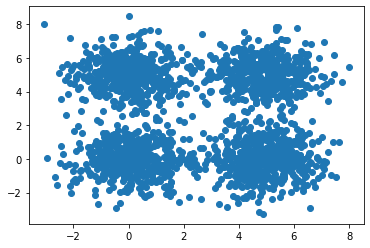

In [ ]:
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')

### **3. K-Means**

Implement the algorithm

In [ ]:
class KMeans():
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

        ######## Helper fields #########
        self.X_fit_ = None      # Here you should store the dataset X.
                                # This can be useful for the next tasks.

        self.labels_ = None     # Here you should store the final labels.
                                # That is, the clusters indices for all the samples

        self.centroids = None   # Here you should store the final centroids.

        self.labels_history = []    # Here you should store the labels of each iteration.
                                    # This can also be useful later.

        self.centroids_history = [] # Here you should store the centroids of each iteration.
                                    # This can also be useful later.

        self.costs = []             # Here you should store the costs of the iterations.
                                    # That is, you should calculate the cost in every iteration
                                    # and store it in this list.


    def fit(self, X):
        self.X_fit_ = X
        self.centroids = np.empty((self.n_clusters , X.shape[1]))
        self.centroids_history = []
        for i in range(self.n_clusters):
          self.centroids[i] = X[np.random.choice(range(X.shape[0]))]

        for j in range(self.max_iter):
            self.centroids_history.append(self.centroids)
            self.labels_ = self._get_labels(self.X_fit_)
            self.labels_history.append(self.labels_)
            previous_centroids = np.copy(self.centroids)
            self.centroids = self._get_centroids(self.X_fit_,self.labels_)
            cost = self._calculate_cost(self.X_fit_)
            self.costs.append(cost)

            length = len(self.costs)
            if (self.costs[length-1] == self.costs[length-2]) and (length > 1) :
                #return self.labels_
                break

        #return  self.labels_


    def predict(self, X):
        #### YOUR CODE HERE ####
        return None


    def _get_distances(self, X):
        distance_matrix = np.zeros((X.shape[0],self.n_clusters))
        distance_for_x = np.empty(self.n_clusters)
        for i in range(X.shape[0]):

           for j in range(self.n_clusters):
              temp = np.copy(self.centroids[j])
             # distance_for_x[j] = np.sqrt(np.sum(np.power(temp.T.reshape(1,2) - X[i].reshape(1,2), 2)))
              distance_for_x[j] = np.linalg.norm(temp.T.reshape(1,2) - X[i].reshape(1,2))
           distance_for_x = np.array(distance_for_x)
           distance_matrix[i] = distance_for_x


        return distance_matrix


    def _get_labels(self, X):
        labels = []
        distance_matrix = self._get_distances(X)
        for i in range(X.shape[0]):
          row = distance_matrix[i, :]
          labels.append(np.argmin(row))
        return labels  #check if ok


    def _get_centroids(self, X, labels):
        centroids = np.empty((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            index = np.array(labels).reshape(X.shape[0])
            index = np.where(index == i)
            data = X[index]
            centroids[i] = np.mean(data, axis=0)
        return centroids #add to new centtoid

    def _calculate_cost(self, X):
      cost = 0
      for i in range(X.shape[0]):
          cost +=  np.sum(np.power(X[i] -self.centroids[self.labels_[i]], 2))
      return cost





Run the algorithm on the 2D dataset

In [ ]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

Plot a graph of the costs as a function of the iterations

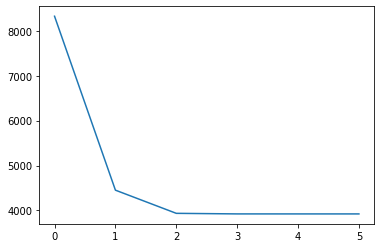

In [ ]:
costs = kmeans.costs
#print(costs)
plt.plot(costs)

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>

2 clusters: 16565.24179449395 <br>
3 clusters: 10031.329151035172<br>
4 clusters: 3821.4926493957983<br>
6 clusters: 3134.800188270003<br>
8 clusters: 2640.040491602125<br>
10 clusters: 2271.589593377371<br>
20 clusters: 1121.9107739582385<br>

Now write a code that plots the clusters and the locations of the centroids at each iteration

Iteration Number 1:


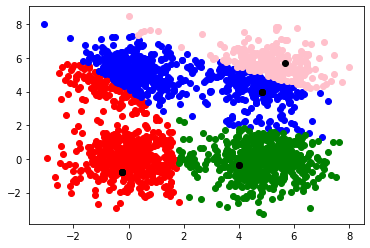

Iteration Number 2:


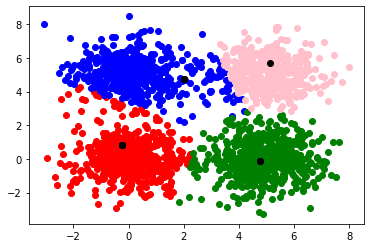

Iteration Number 3:


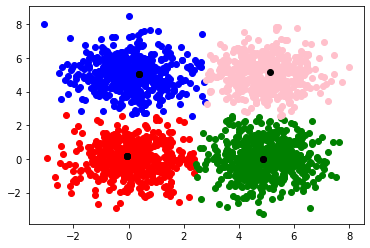

Iteration Number 4:


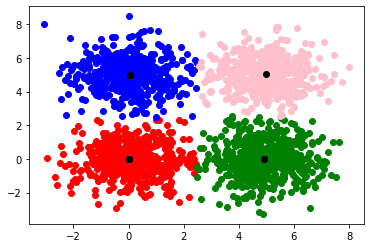

Iteration Number 5:


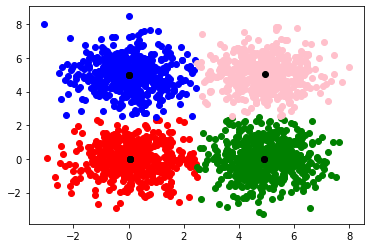

Iteration Number 6:


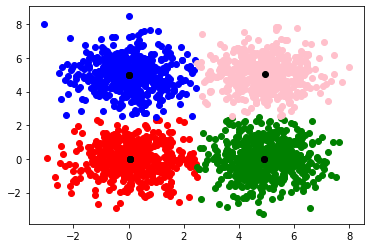

In [ ]:
#print(kmeans.centroids_history)
#print(kmeans.labels_history[0])
cdict = {0: 'red', 1: 'blue', 2: 'green', 3: 'pink'}
for i in range(len(costs)):
  print("Iteration Number " + str(i+1) + ":")
  plt.figure()
  labels = kmeans.labels_history[i]
  for g in range(4):
     index = np.array(labels).reshape(X.shape[0])
     index = np.where(index == g)
     data = X[index]
     plt.scatter(data[:, 0], data[:, 1],c =cdict[g], cmap='viridis')
     plt.scatter(kmeans.centroids_history[i][:, 0], kmeans.centroids_history[i][:, 1], cmap='viridis', c='black')
  plt.show()


## Part 2 - PCA (50%)

In this part you will implement the PCA algorithm on the MNIST dataset.<br>
**As in the first part, your implementation will be based on the numpy package only.**

### **1. Useful packages**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml

### **2. Data**

Load the MNIST dataset from sklearn datasets.

In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

### **3. PCA**

Implement the PCA algorithm here.<br> Don't forget to center the data, i.e. make the mean of the columns of the dataset to 0.

In [ ]:
import numpy as np

class PCA:
    def __init__(self):
        self.V = None

    def fit(self, X):
        X_mean = np.mean(X, axis = 0)
        X = X - X_mean
        #cov_matrix = np.dot(X.T, X)
        cov_matrix = np.cov(X.T)
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        index_eigeVal_descending_order = np.argsort(eigenvalues)[::-1]
        eigenvectors_sort_by_eigeval = eigenvectors[:,index_eigeVal_descending_order]
        self.V = eigenvectors_sort_by_eigeval
        return self.V

    def transform(self, X, n_dimentions):
         X_mean = np.mean(X, axis = 0)
         X = X - X_mean
         #self.V = self.V[:,0:n_dimentions]
         V_r = self.V[:,0:n_dimentions]
         X_reduced = np.dot(X, V_r).T
         return X_reduced



Run the algorithm on MNIST dataset.

In [ ]:
pca = PCA()
V = pca.fit(X)

# transform the data to the top 2 principal components
X_reduced = pca.transform(X, 2).T

#print(X_reduced.shape)
#print(X.shape)

Plot the data in the top 2 principal component space.

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


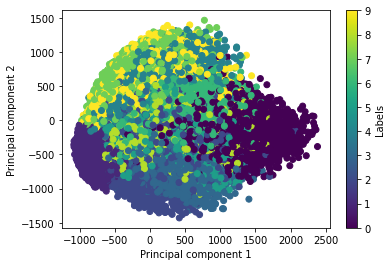

In [ ]:
y = [int(label) for label in y]
fig, ax = plt.subplots()
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')

cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')

plt.show()

As we showed in class, $V\in \mathbb{R}^{d\times r}$  is the matrix whose colmns are the top  $r$ eigenvectors of $X^TX$. That is, the eigenvectors that correspond to the  $r$ largest eigenvalues. <br>
In the cell below, Write a code that plots the two matrices $V^TV$ and $VV^T$.<br>
Explain the differences between the two matrices<br>
ANSWER: <br>
The differences between two matrices are:
1. $V^TV$ is equal to I, the explanation is that cov(vi,vj) = 0 and     cov(vi,vi) == 1 this because V is orthonormal and thus $V^TV$ is equal to I.
2.  <br>
if x is not on subspace thus x_hat  = $VV^T$ * x where x_hat != x
thus $VV^T$ in not equal to I. <br>
 $VV^T$ is the matrix of the amount of Variance that explained by every feature.


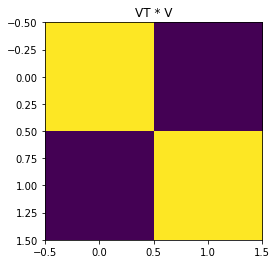

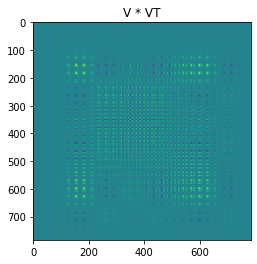

In [ ]:
V_r = pca.V[:,0:2]
V_VT = np.dot(V_r, V_r.T).real
VT_V = np.dot(V_r.T, V_r).real
plt.imshow(VT_V)
plt.title('VT * V')
plt.show()
print(" ")
plt.imshow(V_VT)
plt.title('V * VT')
plt.show()


Your Explanation:

Now write a function that projects a sample to a n-dimentional space  and **recontsturct** it to the original space.

In [ ]:
def pca_reconstruction(x, n_dimentions):
    V_r = pca.V[:,0:n_dimentions]
    # pca.V.T.shape = (2, 784) x.shape = (784,) so x_project.shape = (2,)
    x_project = np.dot(V_r.T, x)
    # (784, 2) * (2,) = (784,)
    x_reconstructed = np.dot(V_r,x_project)
    return x_reconstructed

Now write code that samples a random image from the dataset, and uses the function above to project it into n-dimensional space and reconstruct it to the original space. <br><br>
Is the reconstructed image the original image?
<br><br>
ANSWER:  <br>
in order to be excactly the original image, the random picture x should be on the subspace, such VVt will be equal to I and thus x_hat will be equal to x. So, in our case the random pictures are not on the subspace and thus there is an error between x and x_hat so thay are nor equal.
As we learn in class x_hat = VVt * x.  
<br>
If x in on subspace, VVt is equal to I and thus x_hat == x.
<br><br>

Perform the reconstruction above from spaces of dimensions: 3, 10, 100.<br>


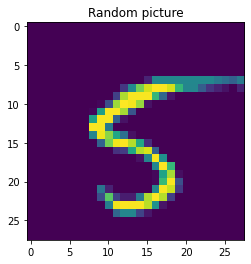

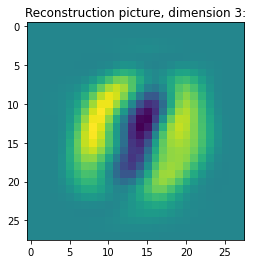

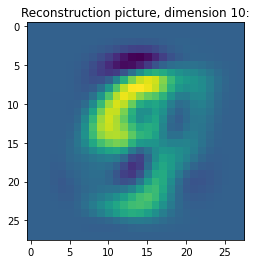

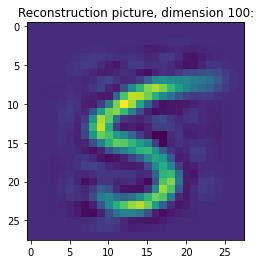

In [ ]:
import random
### CHOOSE A RANDOM PICTURE###
x = random.choice(X)
plt.imshow(x.reshape(28,28))
plt.title('Random picture')
plt.show()
print("")
#################

dimensions = [3,10,100]
for dimension in dimensions:
    x_hat = pca_reconstruction(x, dimension).real
    plt.title('Reconstruction picture, dimension ' + str(dimension) +":")
    plt.imshow(x_hat.reshape(28,28))
    plt.show()
    print("")
